# DATA PREPROCESSING AND EXPLORATION

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data

### The following were removed in Excel before importing
- All records where "QCountry: Hidden in live" equals New Zealand
- "hMonth_NZ: Hidden in live", "S2_NZ", "S4_NZ" and "S4_NZr6oe" as relates to New Zealand
- "uuid: Participant identifier" as not relevant
- "status: Participant status", "hMonth: Hidden in live", "INTRO", "AE1", "QCountry: Hidden in live" as all values the same
- "HIGH_RISKr2", "HIGH_RISKr3", "Q2r1", "Q2r2", "Q2r3", "Q2r4", "Q2r5", "Q2r6" as all answers NULL
- "hS2: HIDDEN QUESTION", "GCCSA_2" not relevent as combines values from 2 existing columns with the only difference being that GREATER or GREAT is used instead of METRO and REST OF is used instead of REGIONAL.
- "S4" & "S4r12oe" merged into 1 column called Ethnicity Background where "S4r12oe" responses replace "Other, please specify" in "S4"
- "Q7r11" & "Q7r11oe" merged into 1 column called Q7r11 where "Q7r11oe" responses replace "Other, please specify" in "Q7r11"
- "Q9r9" & "Q9r9oe" merged into 1 column called Q9r9 where "Q9r9oe" responses replace "Something else, please specify:" in "Q9r9"
- "Postcode" as it contains 593 different values and the only sensible way to group this data would be by "State" which already exists as a column

NB: "Q1r22" and "Q1r22oe" have been renamed to "Other" & "Other_Response". Reponses from "Other_Response" will be moved to "Other" where
    the value is "Other, specify". The "Other_Response" column will then be removed. This was too much work to do manually so will be done in the cell      below.

In [2]:
df = pd.read_excel('../data/90283 Analysis.xlsx',index_col='Record_Number')

## Clean Data

In [3]:
# Fillin missing data with "No Response")
df.loc[:,['Other_Responses','Q3','Q4','Q5','Q7r1','Q7r2','Q7r3','Q7r4','Q7r5','Q7r6','Q7r7','Q7r8','Q7r9'
          ,'Q7r10','Q7r11','Q8','Q9r1','Q9r2','Q9r3','Q9r4','Q9r5','Q9r6','Q9r7','Q9r8','Q9r9','Q9r10']] = df.loc[:,['Other_Responses',
                                                                                                            'Q3','Q4','Q5','Q7r1',
                                                                                                            'Q7r2','Q7r3','Q7r4',
                                                                                                            'Q7r5','Q7r6','Q7r7',
                                                                                                            'Q7r8','Q7r9','Q7r10',
                                                                                                            'Q7r11','Q8','Q9r1',
                                                                                                            'Q9r2','Q9r3','Q9r4',
                                                                                                            'Q9r5','Q9r6','Q9r7',
                                                                                                            'Q9r8','Q9r9','Q9r10']
                                                                                                            ].fillna('No Response')


# Merge responses from  "Other" and "Other_Response" into 1 column called "Other"
df['Other'] = [v.Other_Responses if v.Other == 'Other, specify' else v.Other for i,v in df.iterrows()]
df.drop('Other_Responses',axis = 1,inplace=True)


# Consilidate various none responses in "Other" column into single value of "Other, Not Specified"
other_none_values = ['No Response', 'none','Nothing','None of the above']
df['Other'] = ['Other, Not Specified' if v.Other in other_none_values else v.Other for i,v in df.iterrows()]


# Relabel data
df['Q7r1'] = ['No' if v.Q7r1[0:2] == 'NO' else v.Q7r1 if v.Q7r1 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r2'] = ['No' if v.Q7r2[0:2] == 'NO' else v.Q7r2 if v.Q7r2 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r3'] = ['No' if v.Q7r3[0:2] == 'NO' else v.Q7r3 if v.Q7r3 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r4'] = ['No' if v.Q7r4[0:2] == 'NO' else v.Q7r4 if v.Q7r4 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r5'] = ['No' if v.Q7r5[0:2] == 'NO' else v.Q7r5 if v.Q7r5 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r6'] = ['No' if v.Q7r6[0:2] == 'NO' else v.Q7r6 if v.Q7r6 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r7'] = ['No' if v.Q7r7[0:2] == 'NO' else v.Q7r7 if v.Q7r7 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r8'] = ['No' if v.Q7r8[0:2] == 'NO' else v.Q7r8 if v.Q7r8 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r9'] = ['No' if v.Q7r9[0:2] == 'NO' else v.Q7r9 if v.Q7r9 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r10'] = ['No' if v.Q7r10[0:2] == 'NO' else v.Q7r10 if v.Q7r10 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q7r11'] = ['No' if v.Q7r11[0:2] == 'NO' else v.Q7r11 if v.Q7r11 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r1'] = ['No' if v.Q9r1[0:2] == 'NO' else v.Q9r1 if v.Q9r1 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r2'] = ['No' if v.Q9r2[0:2] == 'NO' else v.Q9r2 if v.Q9r2 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r3'] = ['No' if v.Q9r3[0:2] == 'NO' else v.Q9r3 if v.Q9r3 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r4'] = ['No' if v.Q9r4[0:2] == 'NO' else v.Q9r4 if v.Q9r4 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r5'] = ['No' if v.Q9r5[0:2] == 'NO' else v.Q9r5 if v.Q9r5 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r6'] = ['No' if v.Q9r6[0:2] == 'NO' else v.Q9r6 if v.Q9r6 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r7'] = ['No' if v.Q9r7[0:2] == 'NO' else v.Q9r7 if v.Q9r7 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r8'] = ['No' if v.Q9r8[0:2] == 'NO' else v.Q9r8 if v.Q9r8 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r9'] = ['No' if v.Q9r9[0:2] == 'NO' else v.Q9r9 if v.Q9r9 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['Q9r10'] = ['No' if v.Q9r10[0:2] == 'NO' else v.Q9r10 if v.Q9r10 == 'No Response' else 'Yes' for i,v in df.iterrows()]
df['AE2'] = ['Yes' if v.AE2[0:3] == 'Yes' else 'No' if v.AE2[0:2] == 'No' else 'Don''t know/not sure' for i,v in df.iterrows()]
df['State'] = [v.State[0:2] if v.State[2:3] == ' ' else v.State[0:3] for i,v in df.iterrows()]
df['Asthma_moderate'] = ['No' if v.Asthma_moderate[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Asthma_severe'] = ['No' if v.Asthma_severe[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Cardiovascular'] = ['No' if v.Cardiovascular[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['COPD_moderate'] = ['No' if v.COPD_moderate[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['COPD_severe'] = ['No' if v.COPD_severe[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Dementia_Alzheimer'] = ['No' if v.Dementia_Alzheimer[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Diabetes'] = ['No' if v.Diabetes[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Disabilities'] = ['No' if v.Disabilities[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Hypertension'] = ['No' if v.Hypertension[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Liver'] = ['No' if v.Liver[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Neurodevelopmental'] = ['No' if v.Neurodevelopmental[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Obesity'] = ['No' if v.Obesity[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Other_Chronic_Respiratory'] = ['No' if v.Other_Chronic_Respiratory[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Renal_Kidney'] = ['No' if v.Renal_Kidney[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Autoimmune'] = ['No' if v.Autoimmune[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Cancer'] = ['No' if v.Cancer[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Chronic_Infections'] = ['No' if v.Chronic_Infections[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Congenital_Acquired_Heart_Disease'] = ['No' if v.Congenital_Acquired_Heart_Disease[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Sickle'] = ['No' if v.Sickle[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Solid_Organ'] = ['No' if v.Solid_Organ[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['Previously_Admitted_COVID19'] = ['No' if v.Previously_Admitted_COVID19[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['HIGH_RISKr1'] = ['No' if v.HIGH_RISKr1[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['HIGH_RISKr4'] = ['No' if v.HIGH_RISKr4[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['HIGH_RISKr5'] = ['No' if v.HIGH_RISKr5[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]
df['HIGH_RISKr6'] = ['No' if v.HIGH_RISKr6[0:2] == 'NO' else 'Yes' for i,v in df.iterrows()]


# Convert coloms to boolean data type where only 2 responses exist
# NB: For Gender, False for Female and True for Male
#     For GCCSA, False for METRO and True for REGIONAL
#     For remaining columns, False for No and True for Yes
# df['Gender'] = [False if v.Gender == 'Female' else True for i,v in df.iterrows()]
df['GCCSA'] = [False if v.GCCSA == 'METRO' else True for i,v in df.iterrows()]
df['Asthma_moderate'] = [False if v.Asthma_moderate == 'No' else True for i,v in df.iterrows()]
df['Asthma_severe'] = [False if v.Asthma_severe == 'No' else True for i,v in df.iterrows()]
df['Cardiovascular'] = [False if v.Cardiovascular == 'No' else True for i,v in df.iterrows()]
df['COPD_moderate'] = [False if v.COPD_moderate == 'No' else True for i,v in df.iterrows()]
df['COPD_severe'] = [False if v.COPD_severe == 'No' else True for i,v in df.iterrows()]
df['Dementia_Alzheimer'] = [False if v.Dementia_Alzheimer == 'No' else True for i,v in df.iterrows()]
df['Diabetes'] = [False if v.Diabetes == 'No' else True for i,v in df.iterrows()]
df['Disabilities'] = [False if v.Disabilities == 'No' else True for i,v in df.iterrows()]
df['Hypertension'] = [False if v.Hypertension == 'No' else True for i,v in df.iterrows()]
df['Liver'] = [False if v.Liver == 'No' else True for i,v in df.iterrows()]
df['Neurodevelopmental'] = [False if v.Neurodevelopmental == 'No' else True for i,v in df.iterrows()]
df['Obesity'] = [False if v.Obesity == 'No' else True for i,v in df.iterrows()]
df['Other_Chronic_Respiratory'] = [False if v.Other_Chronic_Respiratory == 'No' else True for i,v in df.iterrows()]
df['Renal_Kidney'] = [False if v.Renal_Kidney == 'No' else True for i,v in df.iterrows()]
df['Autoimmune'] = [False if v.Autoimmune == 'No' else True for i,v in df.iterrows()]
df['Cancer'] = [False if v.Cancer == 'No' else True for i,v in df.iterrows()]
df['Chronic_Infections'] = [False if v.Chronic_Infections == 'No' else True for i,v in df.iterrows()]
df['Congenital_Acquired_Heart_Disease'] = [False if v.Congenital_Acquired_Heart_Disease == 'No' else True for i,v in df.iterrows()]
df['Sickle'] = [False if v.Sickle == 'No' else True for i,v in df.iterrows()]
df['Solid_Organ'] = [False if v.Solid_Organ == 'No' else True for i,v in df.iterrows()]
df['Previously_Admitted_COVID19'] = [False if v.Previously_Admitted_COVID19 == 'No' else True for i,v in df.iterrows()]
df['HIGH_RISKr1'] = [False if v.HIGH_RISKr1 == 'No' else True for i,v in df.iterrows()]
df['HIGH_RISKr4'] = [False if v.HIGH_RISKr4 == 'No' else True for i,v in df.iterrows()]
df['HIGH_RISKr5'] = [False if v.HIGH_RISKr5 == 'No' else True for i,v in df.iterrows()]
df['HIGH_RISKr6'] = [False if v.HIGH_RISKr6 == 'No' else True for i,v in df.iterrows()]
df['Q6'] = [False if v.Q6 == 'No' else True for i,v in df.iterrows()]

## Drop columns where there are too many without a response

In [4]:
df.drop(['Q4','Q5','Q7r1','Q7r2','Q7r3','Q7r4','Q7r5','Q7r6','Q7r7','Q7r8','Q7r9','Q7r10','Q7r11',
         'Q8','Q9r1','Q9r2','Q9r3','Q9r4','Q9r5','Q9r6','Q9r7','Q9r8','Q9r9','Q9r10'],axis = 1,inplace=True)

In [5]:
cols_list = df.columns.tolist()
cols_list

['AE2',
 'Gender',
 'State',
 'GCCSA',
 'Age',
 'Age_Bracket',
 'Ethnicity_Background',
 'Asthma_moderate',
 'Asthma_severe',
 'Cardiovascular',
 'COPD_moderate',
 'COPD_severe',
 'Dementia_Alzheimer',
 'Diabetes',
 'Disabilities',
 'Hypertension',
 'Liver',
 'Neurodevelopmental',
 'Obesity',
 'Other_Chronic_Respiratory',
 'Renal_Kidney',
 'Autoimmune',
 'Cancer',
 'Chronic_Infections',
 'Congenital_Acquired_Heart_Disease',
 'Sickle',
 'Solid_Organ',
 'Previously_Admitted_COVID19',
 'Other',
 'HIGH_RISKr1',
 'HIGH_RISKr4',
 'HIGH_RISKr5',
 'HIGH_RISKr6',
 'Q1a',
 'Q2_New',
 'Q3',
 'Q6',
 'Interview_Time']

## Export Cleaned Data For Further Analysis

In [6]:
df.to_csv('cleaned_data.csv')

## Data Exploration

### Relationship Between Age & Interview Time

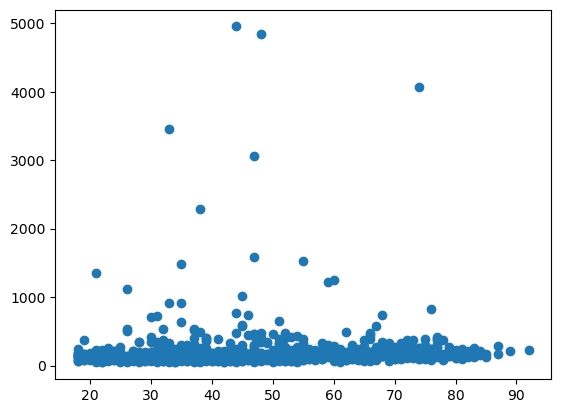

In [7]:
plt.scatter(df.Age, df.Interview_Time)
plt.show()

In [8]:
df_age_it = df[['Age','Interview_Time']]
df_age_it.corr()

,Age,Interview_Time
Age,1.000000,0.053985
Interview_Time,0.053985,1.000000


<Axes: >

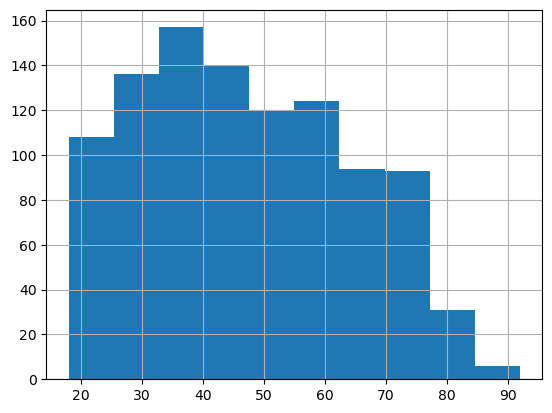

In [9]:
df.Age.hist()

<Axes: >

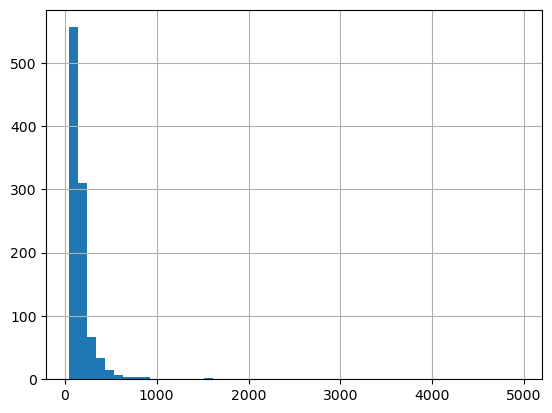

In [10]:
df.Interview_Time.hist(bins=50)

#### No linear relationship or correlation between Age and Interview Time. Age is not normally distributed as skewed to the right while Interview Time appears to have an exponetial distribution.

In [11]:
# Age and Interview_Time by State
df_state = df.groupby('State').agg({'Age': 'mean', 'Interview_Time': 'mean'})
df_state

,Age,Interview_Time
State,,
ACT,43.562500,155.620625
NSW,47.099398,206.852741
NT,39.300000,133.404000
QLD,47.574879,197.800338
SA,47.310811,170.823514
TAS,44.615385,182.839231
VIC,47.328125,192.630469
WA,48.056818,171.328182
